In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/oneautumleaf/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


1. Load the dataset

In [2]:
diabetes_data = load_diabetes()

In [3]:
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['progression'] = diabetes_data.target

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


2. Exploratory Data Analysis

In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


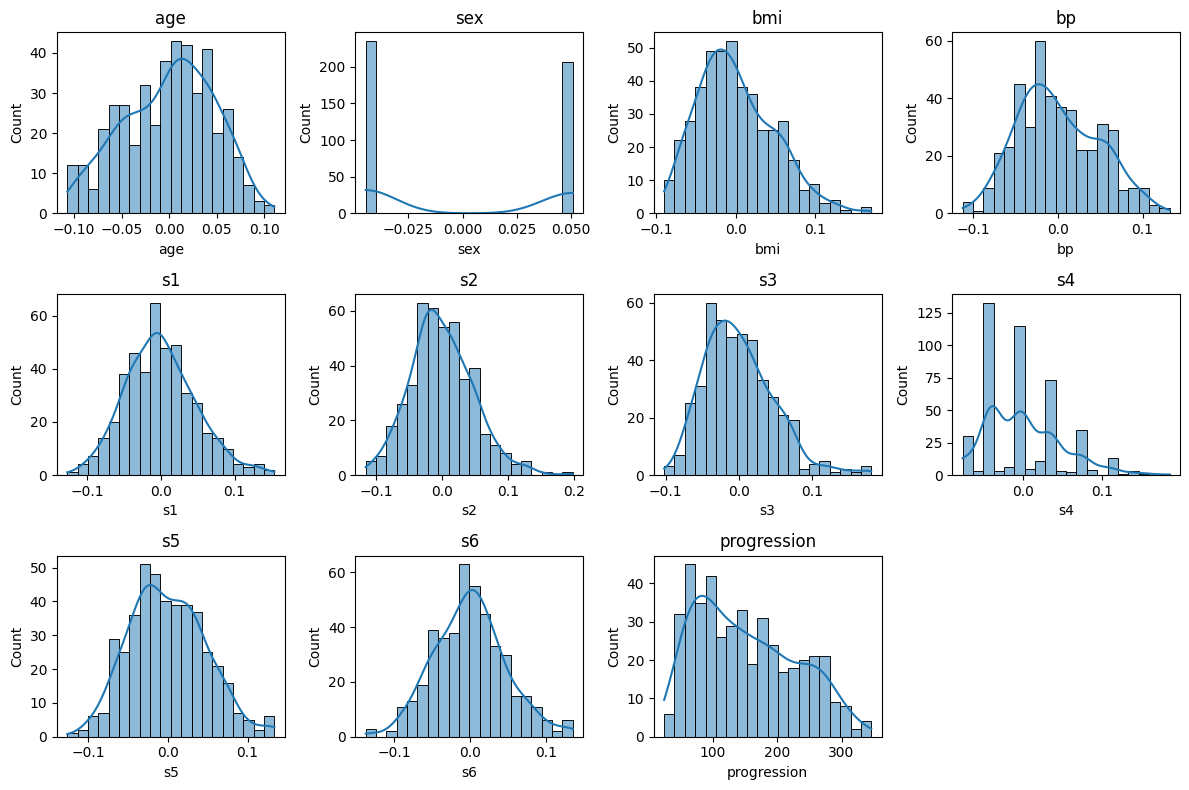

In [6]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

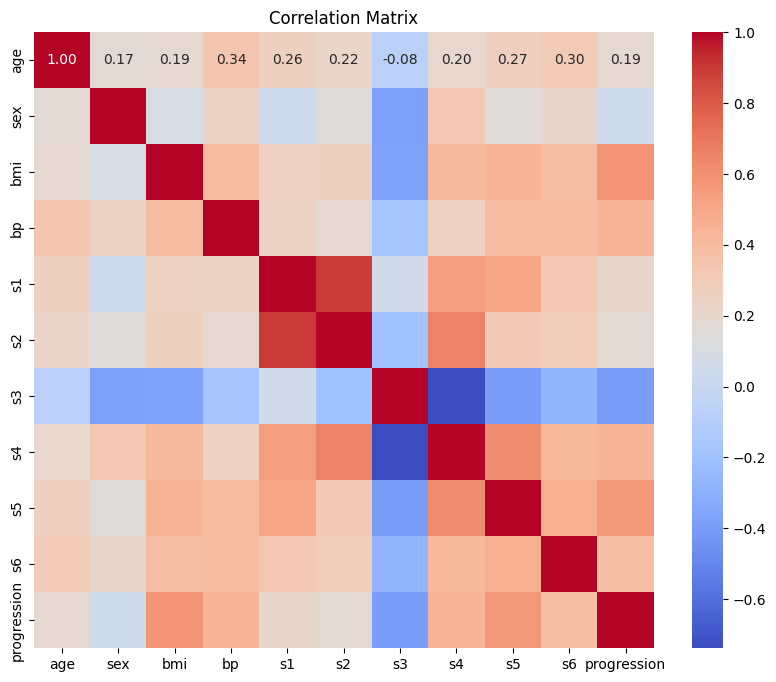

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

3. Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df.isna().sum(axis=0)

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64

Since there are no null values, we don't need to impute any row

In [10]:
X = df.drop('progression', axis=1)
y = df['progression']

In [11]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Model implementation

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [14]:
# Decision Tree Model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
# Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

5. Model Evaluation

In [16]:
# Predictions
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
y_pred_random_forest = random_forest.predict(X_test_scaled)

In [17]:
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

In [18]:
print(f"Mean Squared Error (Decision Tree): {mse_decision_tree}")
print(f"Mean Squared Error (Random Forest): {mse_random_forest}")

Mean Squared Error (Decision Tree): 4887.0
Mean Squared Error (Random Forest): 2959.180561797753


6. Hyperparameter Tuning

In [19]:
X_scaled = scaler.transform(X)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Decision Tree

param_grid_decision_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeRegressor(random_state=42)
grid_search_decision_tree = GridSearchCV(
    estimator=decision_tree, param_grid=param_grid_decision_tree,
    scoring='neg_mean_squared_error', cv=5, verbose=0, n_jobs=-1)

grid_search_decision_tree.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [22]:
best_params_decision_tree = grid_search_decision_tree.best_params_
print(f"Best Hyperparameters (Decision Tree): {best_params_decision_tree}")

Best Hyperparameters (Decision Tree): {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [23]:
best_model_decision_tree = grid_search_decision_tree.best_estimator_
y_pred_decision_tree = best_model_decision_tree.predict(X_test_scaled)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print(f"Mean Square Error (Decision Tree): {mse_decision_tree}")

Mean Square Error (Decision Tree): 2096.5001361256


In [24]:
# Random Forest

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestRegressor(random_state=42)

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_random_forest,
                                         scoring='neg_mean_squared_error', cv=5, verbose=0, n_jobs=-1)

grid_search_random_forest.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [25]:
best_params_random_forest = grid_search_random_forest.best_params_
print("\nBest Hyperparameters (Random Forest):", best_params_random_forest)


Best Hyperparameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [26]:
best_model_random_forest = grid_search_random_forest.best_estimator_
y_pred_random_forest = best_model_random_forest.predict(X_test_scaled)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Mean Squared Error (Random Forest):", mse_random_forest)

Mean Squared Error (Random Forest): 1248.4540709614996


7. Visualization

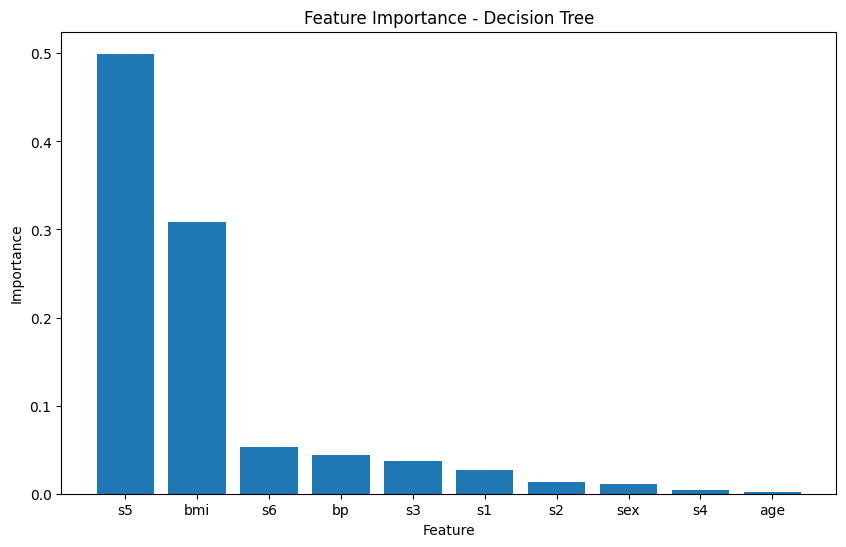

In [27]:
feature_importances = best_model_decision_tree.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i]
           for i in sorted_indices])

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()

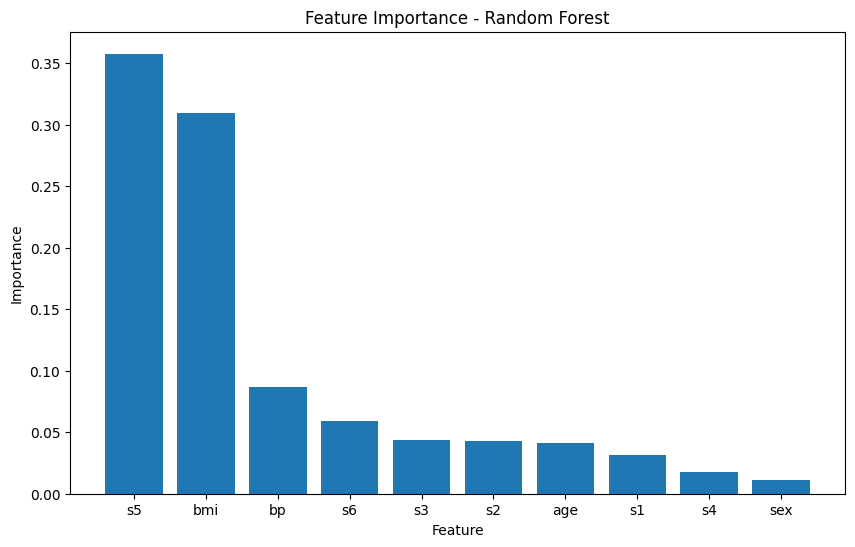

In [28]:
feature_importances = best_model_random_forest.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i]
           for i in sorted_indices])

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

/home/oneautumleaf/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [7]:
x = np.arange(-10, 10, .1)
y = 1 / (1 + np.exp(-x))

In [9]:
x

array([-1.00000000e+01, -9.90000000e+00, -9.80000000e+00, -9.70000000e+00,
       -9.60000000e+00, -9.50000000e+00, -9.40000000e+00, -9.30000000e+00,
       -9.20000000e+00, -9.10000000e+00, -9.00000000e+00, -8.90000000e+00,
       -8.80000000e+00, -8.70000000e+00, -8.60000000e+00, -8.50000000e+00,
       -8.40000000e+00, -8.30000000e+00, -8.20000000e+00, -8.10000000e+00,
       -8.00000000e+00, -7.90000000e+00, -7.80000000e+00, -7.70000000e+00,
       -7.60000000e+00, -7.50000000e+00, -7.40000000e+00, -7.30000000e+00,
       -7.20000000e+00, -7.10000000e+00, -7.00000000e+00, -6.90000000e+00,
       -6.80000000e+00, -6.70000000e+00, -6.60000000e+00, -6.50000000e+00,
       -6.40000000e+00, -6.30000000e+00, -6.20000000e+00, -6.10000000e+00,
       -6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
       -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
       -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
       -4.80000000e+00, -

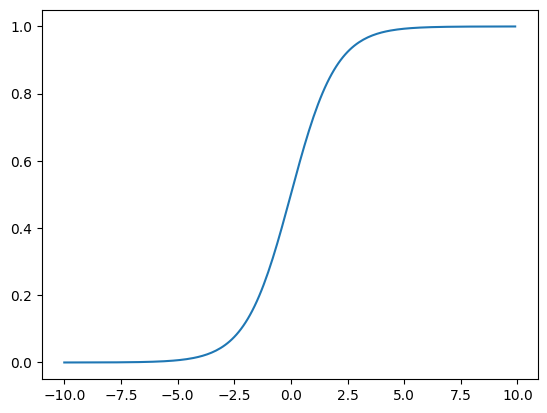

In [8]:
plt.plot(x, y)